# <span style="color:darkblue">ABO Systematic Review - SNPs Used by References for ABO Bloodtyping</span> 

Author: Kiana Lee Martinez\
Date: 2023

# <span style="color:dodgerblue">Background Information</span>

Raw data was exported out of DistillerSR in the form of CSV files.

This notebook documents how we look at the SNPs used by the studies included in this review. 

# <span style="color:dodgerblue">Import Packages</span>

In [2]:
# importing necessary packages
import matplotlib.pyplot as plt # for making plots
import circlify # for making circkle packing chart
import pandas as pd
import numpy as np
import glob # finds all the pathnames matching a specified pattern according to the rules used by the Unix shell
import os # Miscellaneous operating system interfaces

In [3]:
# set useful variables
directory = "../"

# <span style="color:dodgerblue">Read in datasets</span>

## Reading in complete raw data. 

Reading in raw data.

In [5]:
# read in csv file
df_raw = pd.read_csv(directory + "data/complete-raw-data.csv")

## Reading in r2 calculations

Reading in all csv files and concatenating. These csv files where compiled by Andrew Klein from the [NIH LDpop tool](https://analysistools.cancer.gov/LDlink/?tab=ldpop). They are r2 values calculate between the functional SNP (changes depending on which blood type allele we are referencing), and the tag SNPs used by studies included in this systematic review for each 1000 Genome population:

* ALL
* AFR
    * YRI
    * LWK
    * GWD
    * MSL
    * ESN
    * ASW
    * ACB
* AMR
    * MXL
    * PUR
    * CLM
    * PEL
* EAS
    * CHB
    * JPT
    * CHS
    * CDX
    * KHV
* EUR
    * CEU
    * TSI
    * FIN
    * GBR
    * IBS
* SAS
    * GIH
    * PJL
    * BEB
    * STU
    * ITU

### O vs non-O SNPs

The functional SNP is rs8176719.

In [6]:
# set path for files under O data folder
path = f'{directory}data/r2_values/o_data/to-merge'
# point to all files
all_files = glob.glob(os.path.join(path , "*.csv")) #join one or more path components intelligently and then reutrn a list of path names that match pathname

# create an empty list
li = []

# append file names into a the list "li"
for filename in all_files: 
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# create a datarfame that concatenates all the .csv from list "li"
df_o = pd.concat(li, axis=0, ignore_index=True)
# change column names
df_o.columns = ['functional_snp', 'tag_snp', 'population', 'r2', 'd']

In [8]:
# head the dataframe
df_o.tail()

,functional_snp,tag_snp,population,r2,d
283,rs8176719,rs8176719,GIH,1.0,1.0
284,rs8176719,rs8176719,PJL,1.0,1.0
285,rs8176719,rs8176719,BEB,1.0,1.0
286,rs8176719,rs8176719,STU,1.0,1.0
287,rs8176719,rs8176719,ITU,1.0,1.0


In [9]:
# return unique elements in column
df_o.tag_snp.unique()

array(['rs505922', 'rs514659', 'rs529565', 'rs612169', 'rs657152',
       'rs687289', 'rs8176645', 'rs8176704', 'rs8176719'], dtype=object)

In [10]:
# save the merged results
df_o.to_csv(path_or_buf = f"{directory}data/r2_values/o_data/o_snps_r2_d.csv",
              header=1,
              index=None)

### A vs B SNPs

There are four functional SNPs that result in the ABO gene (reference is the gene that encodes the enzyme to create an A blood type allele) encoding the enzyme that results in a B blood type allele. 

These SNPs are: 

* rs7853989
* rs8176743
* rs8176746
* rs8176747

In [11]:
# set path for files under O data folder
path = f'{directory}data/r2_values/b_data/to-merge'
# point to all files
all_files = glob.glob(os.path.join(path , "*.csv")) #join one or more path components intelligently and then reutrn a list of path names that match pathname

# create an empty list
li = []

# append file names into a the list "li"
for filename in all_files: 
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# create a datarfame that concatenates all the .csv from list "li"
df_b = pd.concat(li, axis=0, ignore_index=True)
# change column names
df_b.columns = ['functional_snp', 'tag_snp', 'population', 'r2', 'd']

In [12]:
# head the dataframe
df_b.head()

,functional_snp,tag_snp,population,r2,d
0,rs7853989,rs7853989,ALL,1.0,1.0
1,rs7853989,rs7853989,AFR,1.0,1.0
2,rs7853989,rs7853989,YRI,1.0,1.0
3,rs7853989,rs7853989,LWK,1.0,1.0
4,rs7853989,rs7853989,GWD,1.0,1.0


In [13]:
# return unique elements in column
df_b.tag_snp.unique()

array(['rs7853989', 'rs8176672', 'rs8176720', 'rs8176722', 'rs8176741',
       'rs8176749', 'rs8176743', 'rs8176746', 'rs8176747'], dtype=object)

In [14]:
# save the merged results
df_b.to_csv(path_or_buf = f"{directory}data/r2_values/b_data/b_snps_r2_d.csv",
              header=1,
              index=None)

# <span style="color:dodgerblue">Determine SNP frequency</span>

I want to use circular packing as described [here](https://www.python-graph-gallery.com/circular-packing/) to visualize 1) which blood alleles are being looked at, and 2) the count of per tagSNP. Here is the [GitHub](https://github.com/elmotec/circlify) for `circlify` which is used to do circular packing.

This is the most helpful [link](https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy).

Since I want to make a hierarchical plot, I need to restructure the raw data to look like this:

| bloodtype_allele | snp | count |
| --- | --- | ---|
| O | rs8176719 | 98 |
| O | rs687289 | 35 |
| B | rs8176746 | 69 |
| ... | ... | ... | 

So that `count` represent the number of manuscripts that use this SNP.

The data is split by bloodtype allele (O, B). The bloodtype is split by SNPs. Each SNP has a count of titles associated with it. 


## O vs non-O SNPs

First let's subset out the column we want.

In [16]:
# subset out the columns
df_o_raw = df_raw[["title", "o_snps"]]
df_o_raw.head()

,title,o_snps
0,Quantitative influence of ABO blood groups on ...,rs8176719
1,The ABO blood group locus and a chromosome 3 g...,rs8176719
2,ABO blood type and stroke risk: The RE asons f...,rs687289
3,"ABO, secretor, and Lewis carbohydrate histo‐bl...",rs8176719
4,Coagulation factor VIII: Relationship to cardi...,rs8176719


In [17]:
# look at dataframe shape
df_o_raw.shape

(136, 2)

In [18]:
# split multiple elements and make a new row
df_o_raw = (df_o_raw.drop('o_snps', axis=1) 
             .join
             (
             df_o_raw.o_snps
             .str
             .split(expand=True)
             .stack()
             .reset_index(drop=True, level=1) # resets the index to have one level instead of multiple
             .rename('o_snps') # rename the column           
             ))
# remove commnas from column
df_o_raw['o_snps'] = df_o_raw['o_snps'].str.replace(',','')
# add a column describing which bloodtype allele these snps are describing
df_o_raw.tail(10)

,title,o_snps
128,"Variant ABO blood group alleles, secretor stat...",rs505922
129,Trans-ethnic genome-wide association study of ...,rs8176719
130,Alpha 2A adrenergic receptor polymorphism is a...,rs8176719
131,Histo-blood group gene polymorphisms as potent...,rs8176719
132,Association of FUT2 and ABO with Crohn's disea...,rs8176719
132,Association of FUT2 and ABO with Crohn's disea...,rs687289
133,Characterising cis-regulatory variation in the...,rs8176719
133,Characterising cis-regulatory variation in the...,rs687289
134,Robust evidence for five new Graves' disease r...,rs505922
135,Allelic distribution of ABO gene in Chinese ce...,rs687289


In [19]:
# look at the df shape
df_o_raw.shape

(145, 2)

Now we want to count the number of titles per each SNP within the O bloodtype allele and output this as a dataframe.

In [20]:
# convert value counts output to dataframe
df_o_snp_counts = df_o_raw.o_snps.value_counts().rename_axis('snp').reset_index(name='count')
df_o_snp_counts['bloodtype_allele'] = "O"
df_o_snp_counts

,snp,count,bloodtype_allele
0,rs8176719,67,O
1,rs505922,33,O
2,rs687289,17,O
3,unclear,9,O
4,rs514659,4,O
5,rs657152,3,O
6,rs612169,3,O
7,rs8176645,2,O
8,rs8176704,1,O
9,rs72238104,1,O


### Basic circular packing 

Below is an example of a simple basic cirlc packing chart using the Python package [Circlify](https://github.com/elmotec/circlify).

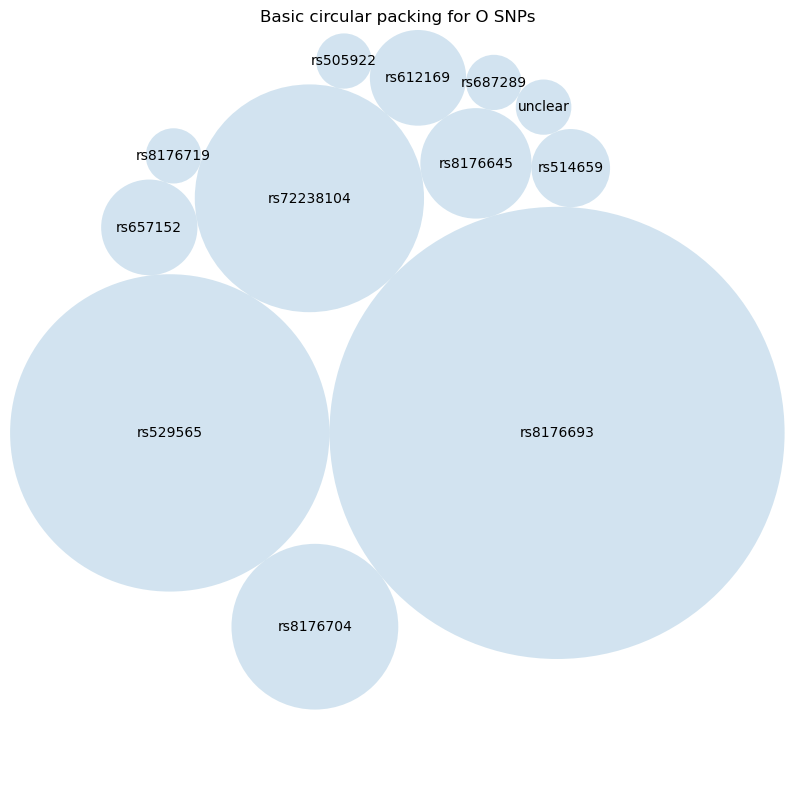

In [21]:
# compute circle positions:
circles = circlify.circlify(
    df_o_snp_counts['count'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)



# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Basic circular packing for O SNPs')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = df_o_snp_counts['snp']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )

## A vs B SNPs

In [22]:
# subset out the columns
df_ab_raw = df_raw[["title", "b_snps"]]
df_ab_raw

,title,b_snps
0,Quantitative influence of ABO blood groups on ...,rs8176746
1,The ABO blood group locus and a chromosome 3 g...,rs8176747
2,ABO blood type and stroke risk: The RE asons f...,rs8176749
3,"ABO, secretor, and Lewis carbohydrate histo‐bl...",unclear
4,Coagulation factor VIII: Relationship to cardi...,NaN
...,...,...
131,Histo-blood group gene polymorphisms as potent...,"rs8176746, rs8176747"
132,Association of FUT2 and ABO with Crohn's disea...,rs8176746
133,Characterising cis-regulatory variation in the...,NaN
134,Robust evidence for five new Graves' disease r...,rs8176746


In [23]:
# look at dataframe shape
df_ab_raw.shape

(136, 2)

In [24]:
# split multiple elements and make a new row
df_ab_raw = (df_ab_raw.drop('b_snps', axis=1) 
             .join
             (
             df_ab_raw.b_snps
             .str
             .split(expand=True)
             .stack()
             .reset_index(drop=True, level=1) # resets the index to have one level instead of multiple
             .rename('b_snps') # rename the column           
             ))
# remove commnas from column
df_ab_raw['b_snps'] = df_ab_raw['b_snps'].str.replace(',','')
# add a column describing which bloodtype allele these snps are describing
df_ab_raw.tail(10)

,title,b_snps
129,Trans-ethnic genome-wide association study of ...,NaN
130,Alpha 2A adrenergic receptor polymorphism is a...,rs8176743
131,Histo-blood group gene polymorphisms as potent...,rs8176746
131,Histo-blood group gene polymorphisms as potent...,rs8176747
132,Association of FUT2 and ABO with Crohn's disea...,rs8176746
133,Characterising cis-regulatory variation in the...,NaN
134,Robust evidence for five new Graves' disease r...,rs8176746
135,Allelic distribution of ABO gene in Chinese ce...,rs8176743
135,Allelic distribution of ABO gene in Chinese ce...,rs8176746
135,Allelic distribution of ABO gene in Chinese ce...,rs8176749


In [25]:
# look at dataframe shape
df_ab_raw.shape

(159, 2)

In [26]:
# convert value counts output to dataframe
df_ab_snp_counts = df_ab_raw.b_snps.value_counts().rename_axis('snp').reset_index(name='count')
df_ab_snp_counts['bloodtype_allele'] = "A/B"
df_ab_snp_counts

,snp,count,bloodtype_allele
0,rs8176746,72,A/B
1,rs8176747,25,A/B
2,rs8176749,15,A/B
3,unclear,10,A/B
4,rs8176743,7,A/B
5,rs7853989,3,A/B
6,rs8176720,3,A/B
7,rs8176672,3,A/B
8,rs8176722,1,A/B
9,rs8176741,1,A/B


## Merge all of count dataframes

Now that I have a dataframe with the information I want, I need to restructure it to be readible by the functions being used to make my circular package plot. 

The accepted dataframe is a nested list with dictionaries.

In [27]:
# concat all the dataframes dataframes
frames = [df_o_snp_counts, df_ab_snp_counts]
snp_counts = pd.concat(frames)
snp_counts = snp_counts[['bloodtype_allele', 'snp', 'count']]
snp_counts

,bloodtype_allele,snp,count
0,O,rs8176719,67
1,O,rs505922,33
2,O,rs687289,17
3,O,unclear,9
4,O,rs514659,4
5,O,rs657152,3
6,O,rs612169,3
7,O,rs8176645,2
8,O,rs8176704,1
9,O,rs72238104,1


In [28]:
# acquire the sum of counts across all bloodtype alleles
bloodtype_allele_sum = snp_counts['count'].sum()
bloodtype_allele_sum

282

In [29]:
# acquire the sum of counts
sum = snp_counts.groupby(['bloodtype_allele']).sum()
sum

,count
bloodtype_allele,
A/B,140
O,142


Combining my datasets for to make a multi-level/hierarchical dataset. This [link](https://blog.enterprisedna.co/multiindex-in-pandas-for-multi-level-or-hierarchical-data/) was helpful to do this.

# <span style="color:dodgerblue">Circle Packing Chart with Multi-Level Hierarchy</span>

As made above, we have our hierarchical dataset called `snp_counts`.

However, we want the data structured as a nested list with dictionaries. Unfortunately, there seems to be a glitch in the underlying `circlify` package that doesn't allow the renaming of the variable `children` to something appropriate to the dataset. 

**I used the `snp_counts` dataset to inform me how to structure the accepted input manually.**  

The package we are using is [Circlify](https://github.com/elmotec/circlify) to create a clustering plot.

In [30]:
data = [{'id': 'bloodtype_allele', 'datum': 392, 'children' : [
              {'id' : "A/B", 'datum' : 140,  
                   'children' : [
                     {'id' : "rs8176746", 'datum' : 72},
                     {'id' : "rs8176747", 'datum' : 25},
                     {'id' : "rs8176749", 'datum' : 15},
                     {'id' : "unclear", 'datum' : 10},
                     {'id' : "rs8176743", 'datum' : 7},
                     {'id' : "rs7853989", 'datum' : 3},
                     {'id' : "rs8176720", 'datum' : 3},
                     {'id' : "rs8176672", 'datum' : 3},
                     {'id' : "rs8176722", 'datum' : 1},
                     {'id' : "rs8176741", 'datum' : 1}
                   ]},
              {'id' : "O", 'datum' : 142,  
                   'children' : [
                     {'id' : "rs8176719", 'datum' : 67},
                     {'id' : "rs505922", 'datum' : 33},
                     {'id' : "rs687289", 'datum' : 17},
                     {'id' : "unclear", 'datum' : 9},
                     {'id' : "rs514659", 'datum' : 4},
                     {'id' : "rs657152", 'datum' : 3},
                     {'id' : "rs612169", 'datum' : 3},
                     {'id' : "rs8176645", 'datum' : 2},
                     {'id' : "rs8176704", 'datum' : 1},
                     {'id' : "rs72238104", 'datum' : 1},
                     {'id' : "rs529565", 'datum' : 1},
                     {'id' : "rs8176693", 'datum' : 1}
                   ]}
    ]}]

In [31]:
# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

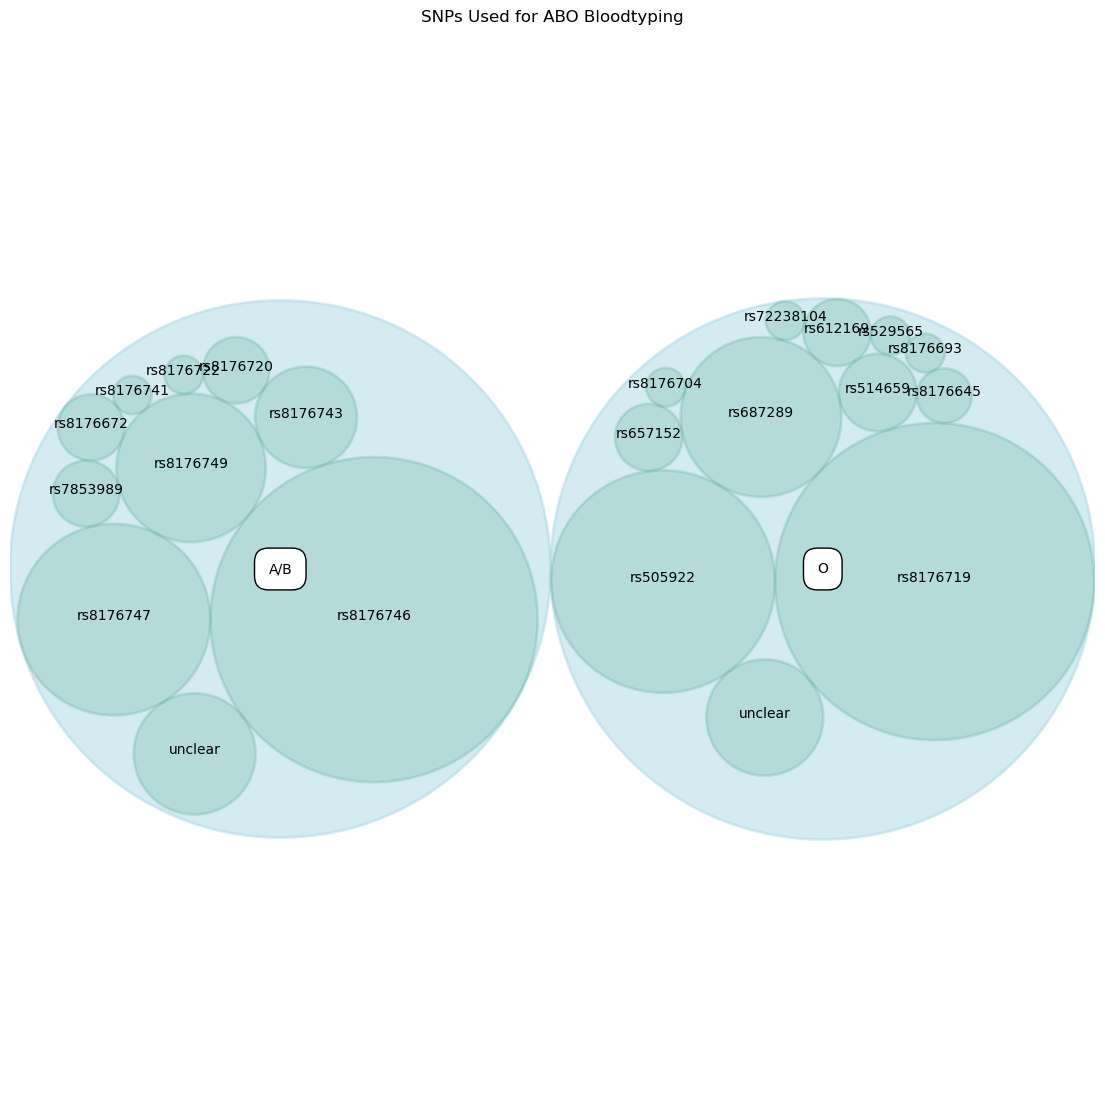

In [38]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('SNPs Used for ABO Bloodtyping')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (bloodtypes):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.3, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="black")

# Print labels for the bloodtypes
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=1))

plt.savefig(f"{directory}results/python_figures/circular-packing-chart.svg")

# <span style="color:dodgerblue">Determine which and how often ABO blood alleles are being assessed</span>

I want to see which blood alleles are being looked at the most. For example, I suspect many references are evaluating just the O blood allele so I want to confirm this. 

Subset out the columns we want from `df_raw`.

In [39]:
# subset out the columns we want
df_sub = df_raw[["title", 
                 "o_snps",
                "b_snps"]]
# output first rows as a preview
df_sub.head()

,title,o_snps,b_snps
0,Quantitative influence of ABO blood groups on ...,rs8176719,rs8176746
1,The ABO blood group locus and a chromosome 3 g...,rs8176719,rs8176747
2,ABO blood type and stroke risk: The RE asons f...,rs687289,rs8176749
3,"ABO, secretor, and Lewis carbohydrate histo‐bl...",rs8176719,unclear
4,Coagulation factor VIII: Relationship to cardi...,rs8176719,NaN


I want to sum up all the times a reference evaluated a particular bloodtype allele; i.e. do not count NAs though we are counting unclears since this indicates they are evaluating the allele but it is unclear which particular SNP they are using to do so. 

In [40]:
# sum of all the times a references looks at this o_allele (removing NAs)
o_allele_reference_sum = df_sub['o_snps'].value_counts(dropna=True).sum()

# sum of all the times a references looks at this b_allele (removing NAs)
b_allele_reference_sum = df_sub['b_snps'].value_counts(dropna=True).sum()

print(o_allele_reference_sum, b_allele_reference_sum)

133 117


Note that when you are evaluating the B allele you are also evaluating the A1 allele since that is the reference. I will use verbage that reflects this.

In [41]:
# make an empty dataset with pre-named columns
ref_sum = pd.DataFrame(columns = ['bloodtype_allele', 'references_count'],
                      index = ['a', 'b'])

# append at existing index
ref_sum.loc['a'] = ['o_allele', o_allele_reference_sum]
ref_sum.loc['b'] = ['a_b_allele', b_allele_reference_sum]
# pring dataframe
ref_sum

,bloodtype_allele,references_count
a,o_allele,133
b,a_b_allele,117


I also want to add proportion to this dataframe.

In [42]:
# count the number of total references
all_ref = len(df_sub)
all_ref

# add proportion to dataframe
ref_sum['proportion'] = (ref_sum['references_count'] / all_ref)
ref_sum

,bloodtype_allele,references_count,proportion
a,o_allele,133,0.977941
b,a_b_allele,117,0.860294


## Bar graph - Number of references investigating each ABO blood type allele

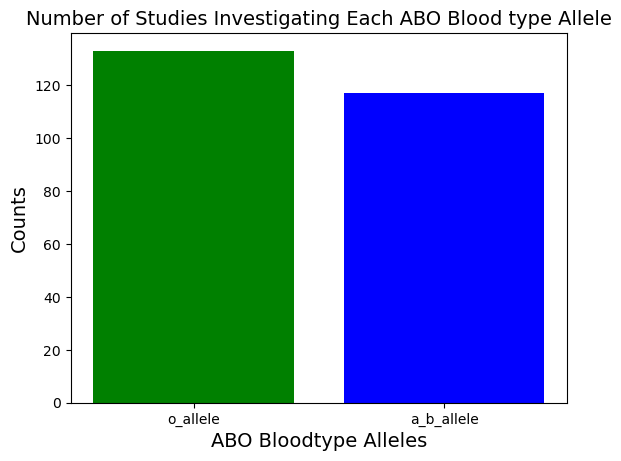

In [43]:
# create graph with matplotlib
New_Colors = ['green','blue','purple']

# save ficgure before show()
fig = plt.gcf()

plt.bar(ref_sum['bloodtype_allele'], ref_sum['references_count'], color=New_Colors)
plt.title('Number of Studies Investigating Each ABO Blood type Allele', fontsize=14)
plt.xlabel('ABO Bloodtype Alleles', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

# save figure
fig.savefig(f"{directory}results/python_figures/bar-number-studies-investigating-each-abo-allele.svg", 
           format='svg')

## How many O only, A/B only, O and A/B

In [44]:
# print first few rows
df_sub.head()

,title,o_snps,b_snps
0,Quantitative influence of ABO blood groups on ...,rs8176719,rs8176746
1,The ABO blood group locus and a chromosome 3 g...,rs8176719,rs8176747
2,ABO blood type and stroke risk: The RE asons f...,rs687289,rs8176749
3,"ABO, secretor, and Lewis carbohydrate histo‐bl...",rs8176719,unclear
4,Coagulation factor VIII: Relationship to cardi...,rs8176719,NaN


In [45]:
# make a new column based off of conditions
df_sub["which_bloodtypes"] = np.nan
df_sub.loc[(df_sub['o_snps'].notna()) & (df_sub['b_snps'].isna()), "which_bloodtypes"] = "o_only"
df_sub.loc[(df_sub['o_snps'].isna()) & (df_sub['b_snps'].notna()), "which_bloodtypes"] = "ab_only"
df_sub.loc[(df_sub['o_snps'].notna()) & (df_sub['b_snps'].notna()), "which_bloodtypes"] = "ab_o"
df_sub.head()

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_8484\1797555322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["which_bloodtypes"] = np.nan
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_8484\1797555322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[(df_sub['o_snps'].notna()) & (df_sub['b_snps'].isna()), "which_bloodtypes"] = "o_only"


,title,o_snps,b_snps,which_bloodtypes
0,Quantitative influence of ABO blood groups on ...,rs8176719,rs8176746,ab_o
1,The ABO blood group locus and a chromosome 3 g...,rs8176719,rs8176747,ab_o
2,ABO blood type and stroke risk: The RE asons f...,rs687289,rs8176749,ab_o
3,"ABO, secretor, and Lewis carbohydrate histo‐bl...",rs8176719,unclear,ab_o
4,Coagulation factor VIII: Relationship to cardi...,rs8176719,NaN,o_only


In [46]:
# acquire the frequency of a column and conver to a dataframe
which_bloodtypes_df = df_sub.which_bloodtypes.value_counts().rename_axis('which_bloodtypes').reset_index(name='counts')
# add in proportions
which_bloodtypes_df['proportion'] = (which_bloodtypes_df['counts'] / which_bloodtypes_df['counts'].sum())
which_bloodtypes_df

,which_bloodtypes,counts,proportion
0,ab_o,114,0.838235
1,o_only,19,0.139706
2,ab_only,3,0.022059


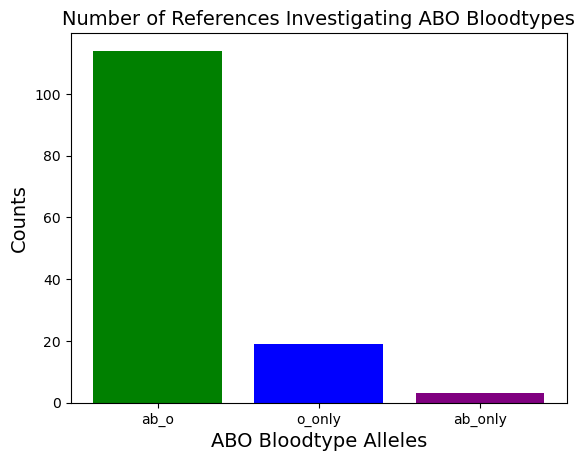

In [47]:
# create a bargraph

# save ficgure before show()
fig = plt.gcf()

# create graph with matplotlib
New_Colors = ['green','blue','purple']
plt.bar(which_bloodtypes_df['which_bloodtypes'], which_bloodtypes_df['counts'], color=New_Colors)
plt.title('Number of References Investigating ABO Bloodtypes', fontsize=14)
plt.xlabel('ABO Bloodtype Alleles', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

# save figure
fig.savefig(f"{directory}results/python_figures/bar-number-studies-investigating-each-abo-allele-2.svg", 
           format='svg')